## Emotion Detection using Classification and Neural Networks

### DATASET
The Dataset is fom Kaggle, a data sciences website.
It is made for a competition to create system that recognise Facial Emotion.
The Dataset can be dowloaded and use for free.

URL : https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset?resource=download

### IMPORTING LIBRAIRIES

In [1]:
# Preprocessing
import numpy as np
import pandas as pd
import os

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### DISPLAY IMAGES
To get an idea of what we use

In [2]:
# size of the picture
picture_size = 48 #the less pixelized we have
# relative path of the dataset downloaded locally
folder_path = "/Users/charlotteportenseigne/Documents/Projects/Emotion-Detection/images/images/"

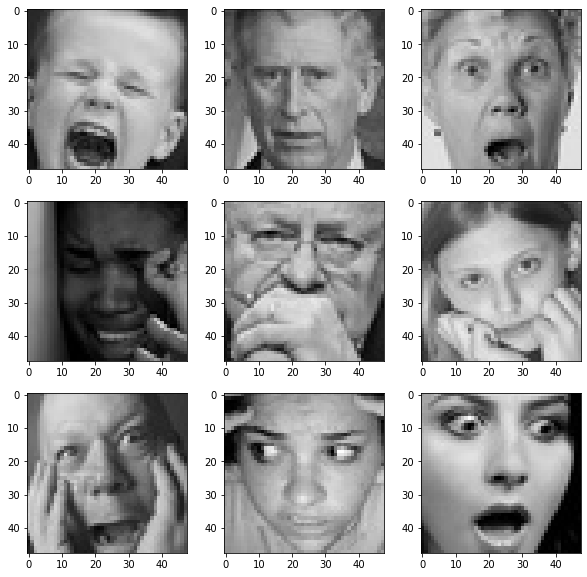

In [3]:
# expression we are looking for
expression = 'fear'

# to show the picture of the expression we're looking for
# size of the picture
plt.figure(figsize= (10,10))

for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    # to automatically find the set of pictures of the expression we want in the folder
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

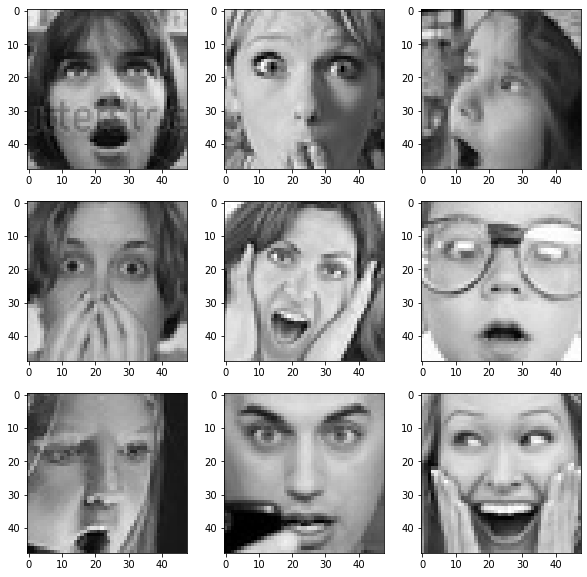

In [4]:
expression_2 = 'surprise'

plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression_2+"/"+
                  os.listdir(folder_path + "train/" + expression_2)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

### TRAINING DATA AND VALIDATION

In [5]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


### BUILDING MODEL

In [6]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

### FITTING THE MODEL WITH THE TRAINING AND VALIDATION DATA

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [8]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/48
225/225 [==============================] - 887s 4s/step - loss: 1.7990 - accuracy: 0.3087 - val_loss: 1.5975 - val_accuracy: 0.3807
Epoch 2/48
225/225 [==============================] - 931s 4s/step - loss: 1.4443 - accuracy: 0.4470 - val_loss: 1.5678 - val_accuracy: 0.4227
Epoch 3/48
225/225 [==============================] - 1105s 5s/step - loss: 1.2849 - accuracy: 0.5079 - val_loss: 1.3896 - val_accuracy: 0.4595
Epoch 4/48
225/225 [==============================] - 1045s 5s/step - loss: 1.1947 - accuracy: 0.5440 - val_loss: 1.1615 - val_accuracy: 0.5605
Epoch 5/48
225/225 [==============================] - 1089s 5s/step - loss: 1.1328 - accuracy: 0.5685 - val_loss: 1.1393 - val_accuracy: 0.5635
Epoch 6/48
225/225 [==============================] - 656s 3s/step - loss: 1.0804 - accuracy: 0.5899 - val_loss: 1.2015 - val_accuracy: 0.5366
Epoch 7/48
225/225 [==============================] - 682s 3s/s

In [9]:
#save the model
from keras.models import load_model

model.save("facial_emotion_model.h5")

Using TensorFlow backend.


### VIZUALIZING ACCURACY AND LOSS

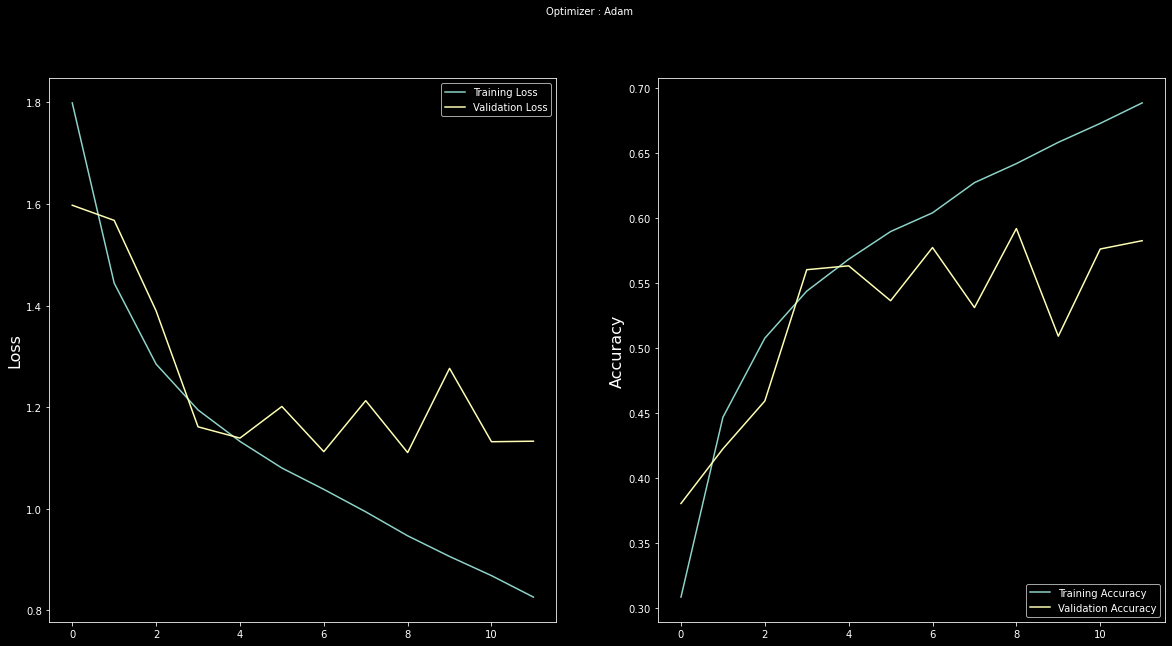

In [10]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
cod efrom 
https://www.kaggle.com/code/bra195002/emotion-classification-cnn-using-keras